In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import tree

## Classification Trees

#### IBM Employee Attrition Dataset

In [2]:
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Cases\IBM Employee Attrition")

In [3]:
ibm_hr = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
dum_ibm = pd.get_dummies(ibm_hr, drop_first=True)

In [4]:
X = dum_ibm.drop('Attrition_Yes', axis=1)
y = dum_ibm['Attrition_Yes']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=2023,
                                                    test_size=0.3)

[Text(0.5, 0.875, 'OverTime_Yes <= 0.5\ngini = 0.271\nsamples = 1029\nvalue = [863, 166]\nclass = No'),
 Text(0.25, 0.625, 'YearsAtCompany <= 1.5\ngini = 0.186\nsamples = 740\nvalue = [663, 77]\nclass = No'),
 Text(0.125, 0.375, 'Age <= 32.5\ngini = 0.375\nsamples = 96\nvalue = [72, 24]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.476\nsamples = 46\nvalue = [28, 18]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.211\nsamples = 50\nvalue = [44, 6]\nclass = No'),
 Text(0.375, 0.375, 'JobSatisfaction <= 1.5\ngini = 0.151\nsamples = 644\nvalue = [591, 53]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.26\nsamples = 130\nvalue = [110, 20]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.12\nsamples = 514\nvalue = [481, 33]\nclass = No'),
 Text(0.75, 0.625, 'JobLevel <= 1.5\ngini = 0.426\nsamples = 289\nvalue = [200, 89]\nclass = No'),
 Text(0.625, 0.375, 'MonthlyIncome <= 2469.5\ngini = 0.498\nsamples = 105\nvalue = [49, 56]\nclass = Yes'),
 Text(0.5625, 0.125, 'gini = 0.381\nsamples = 43\nvalu

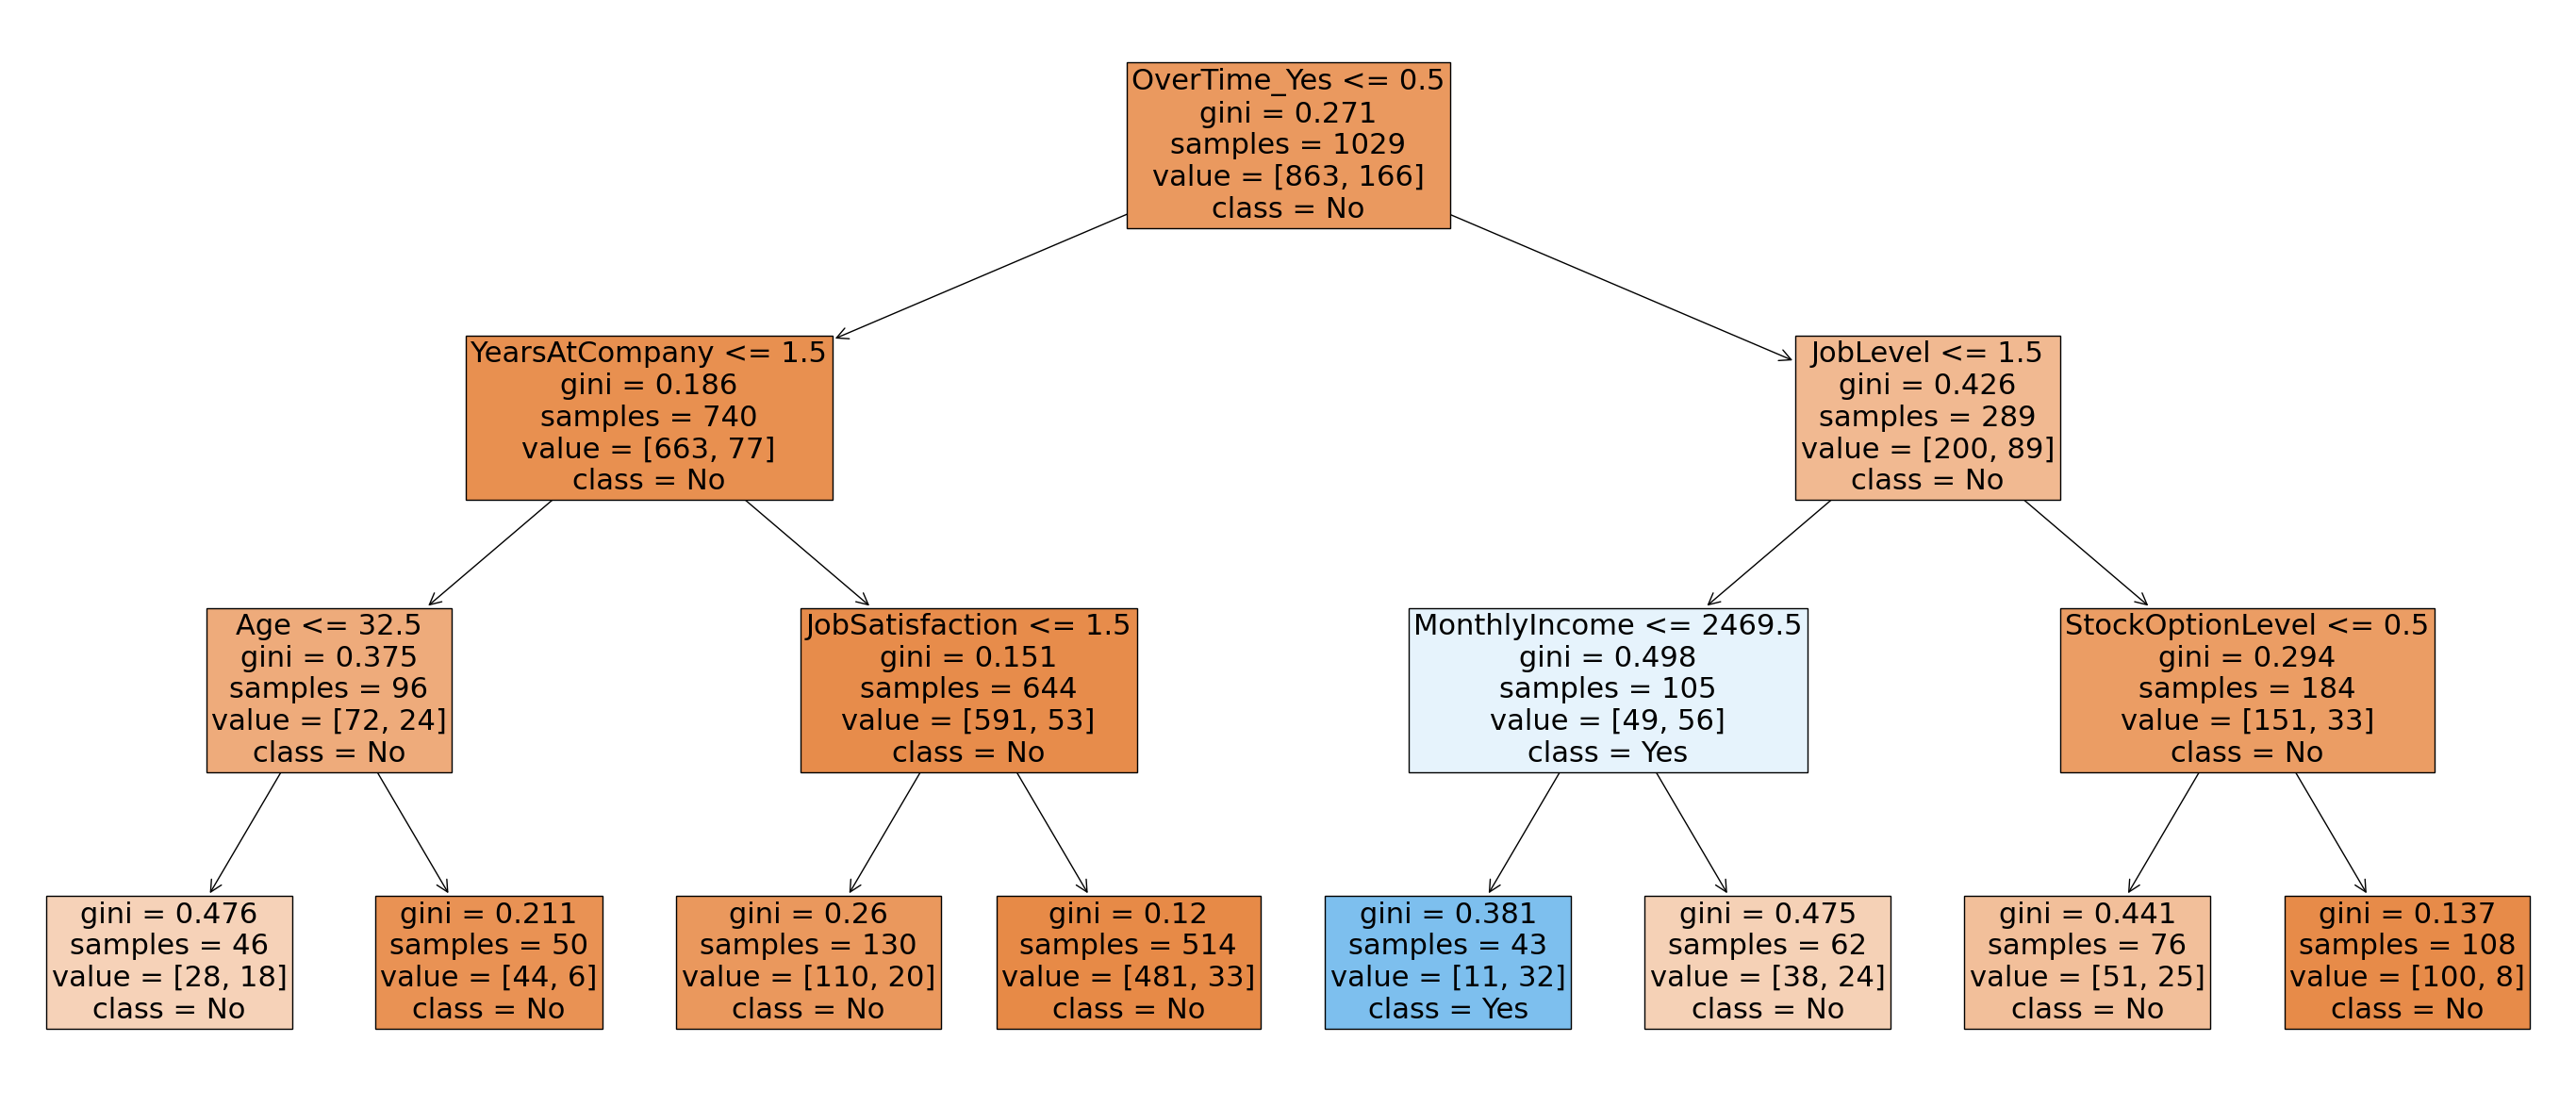

In [6]:
dtc = DecisionTreeClassifier(random_state=2023, max_depth=3)
dtc.fit(X_train, y_train)

plt.figure(figsize=(35,15))
tree.plot_tree(dtc,feature_names=X_train.columns,
               class_names=['No','Yes'],
               filled=True,fontsize=22) 

In [7]:
y_pred = dtc.predict(X_test)

In [8]:
###################### Grid Search CV #######################
kfold = StratifiedKFold(n_splits=5, shuffle=True,
                        random_state=2023)
dtc = DecisionTreeClassifier(random_state=2023)
params = {'max_depth':[None, 3, 4, 5],
          'min_samples_split':[2, 5, 10],
          'min_samples_leaf':[1, 4, 10]}
gcv = GridSearchCV(dtc, param_grid=params, 
                   scoring='roc_auc', cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.718511058347404


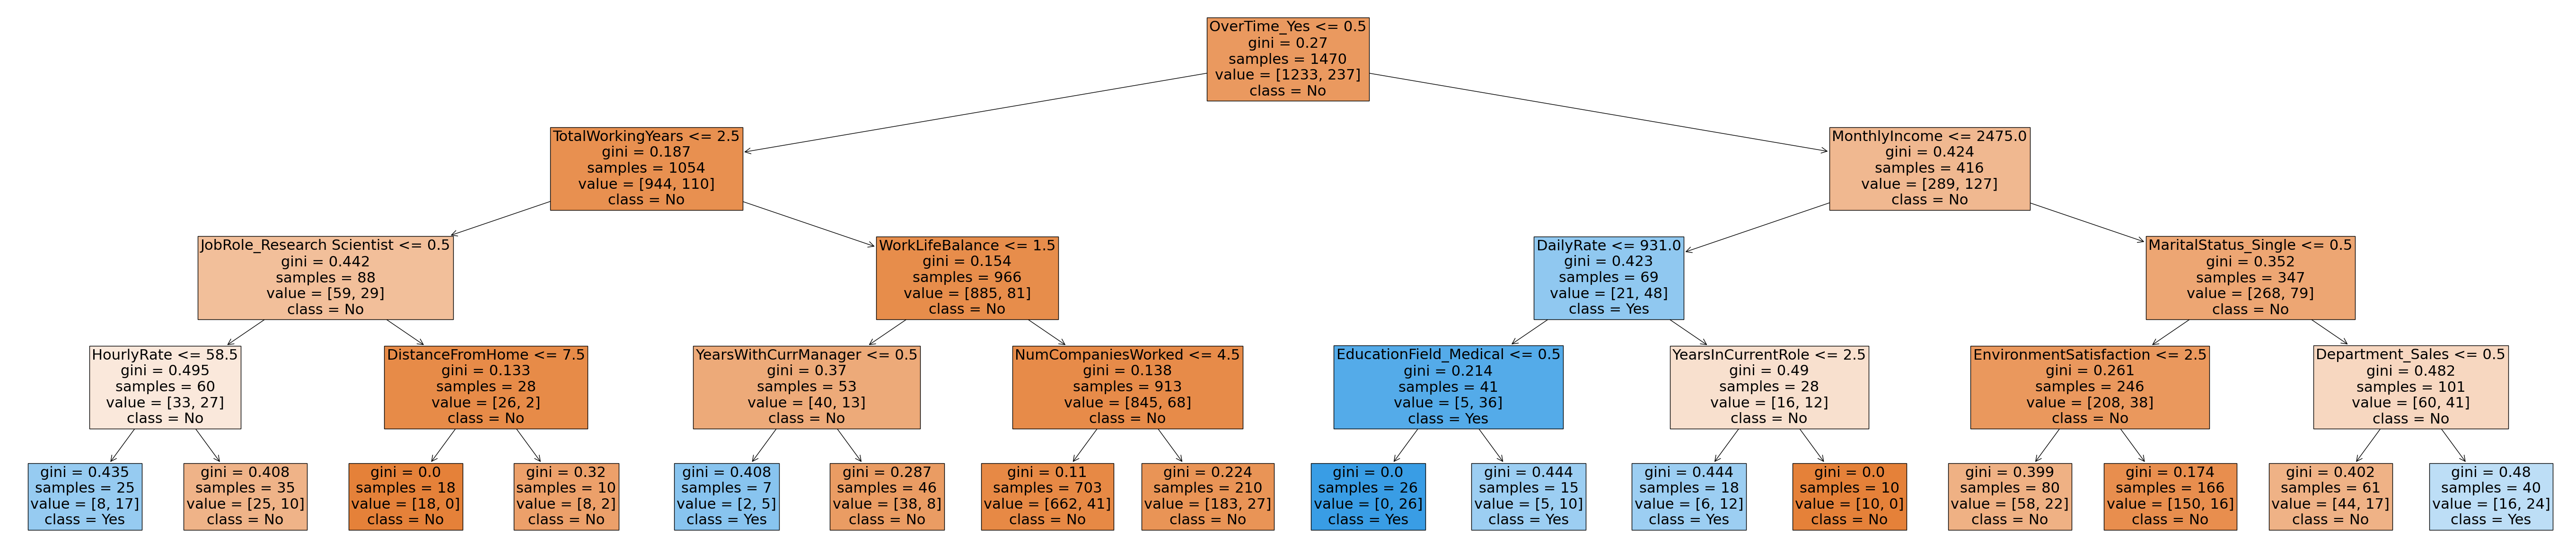

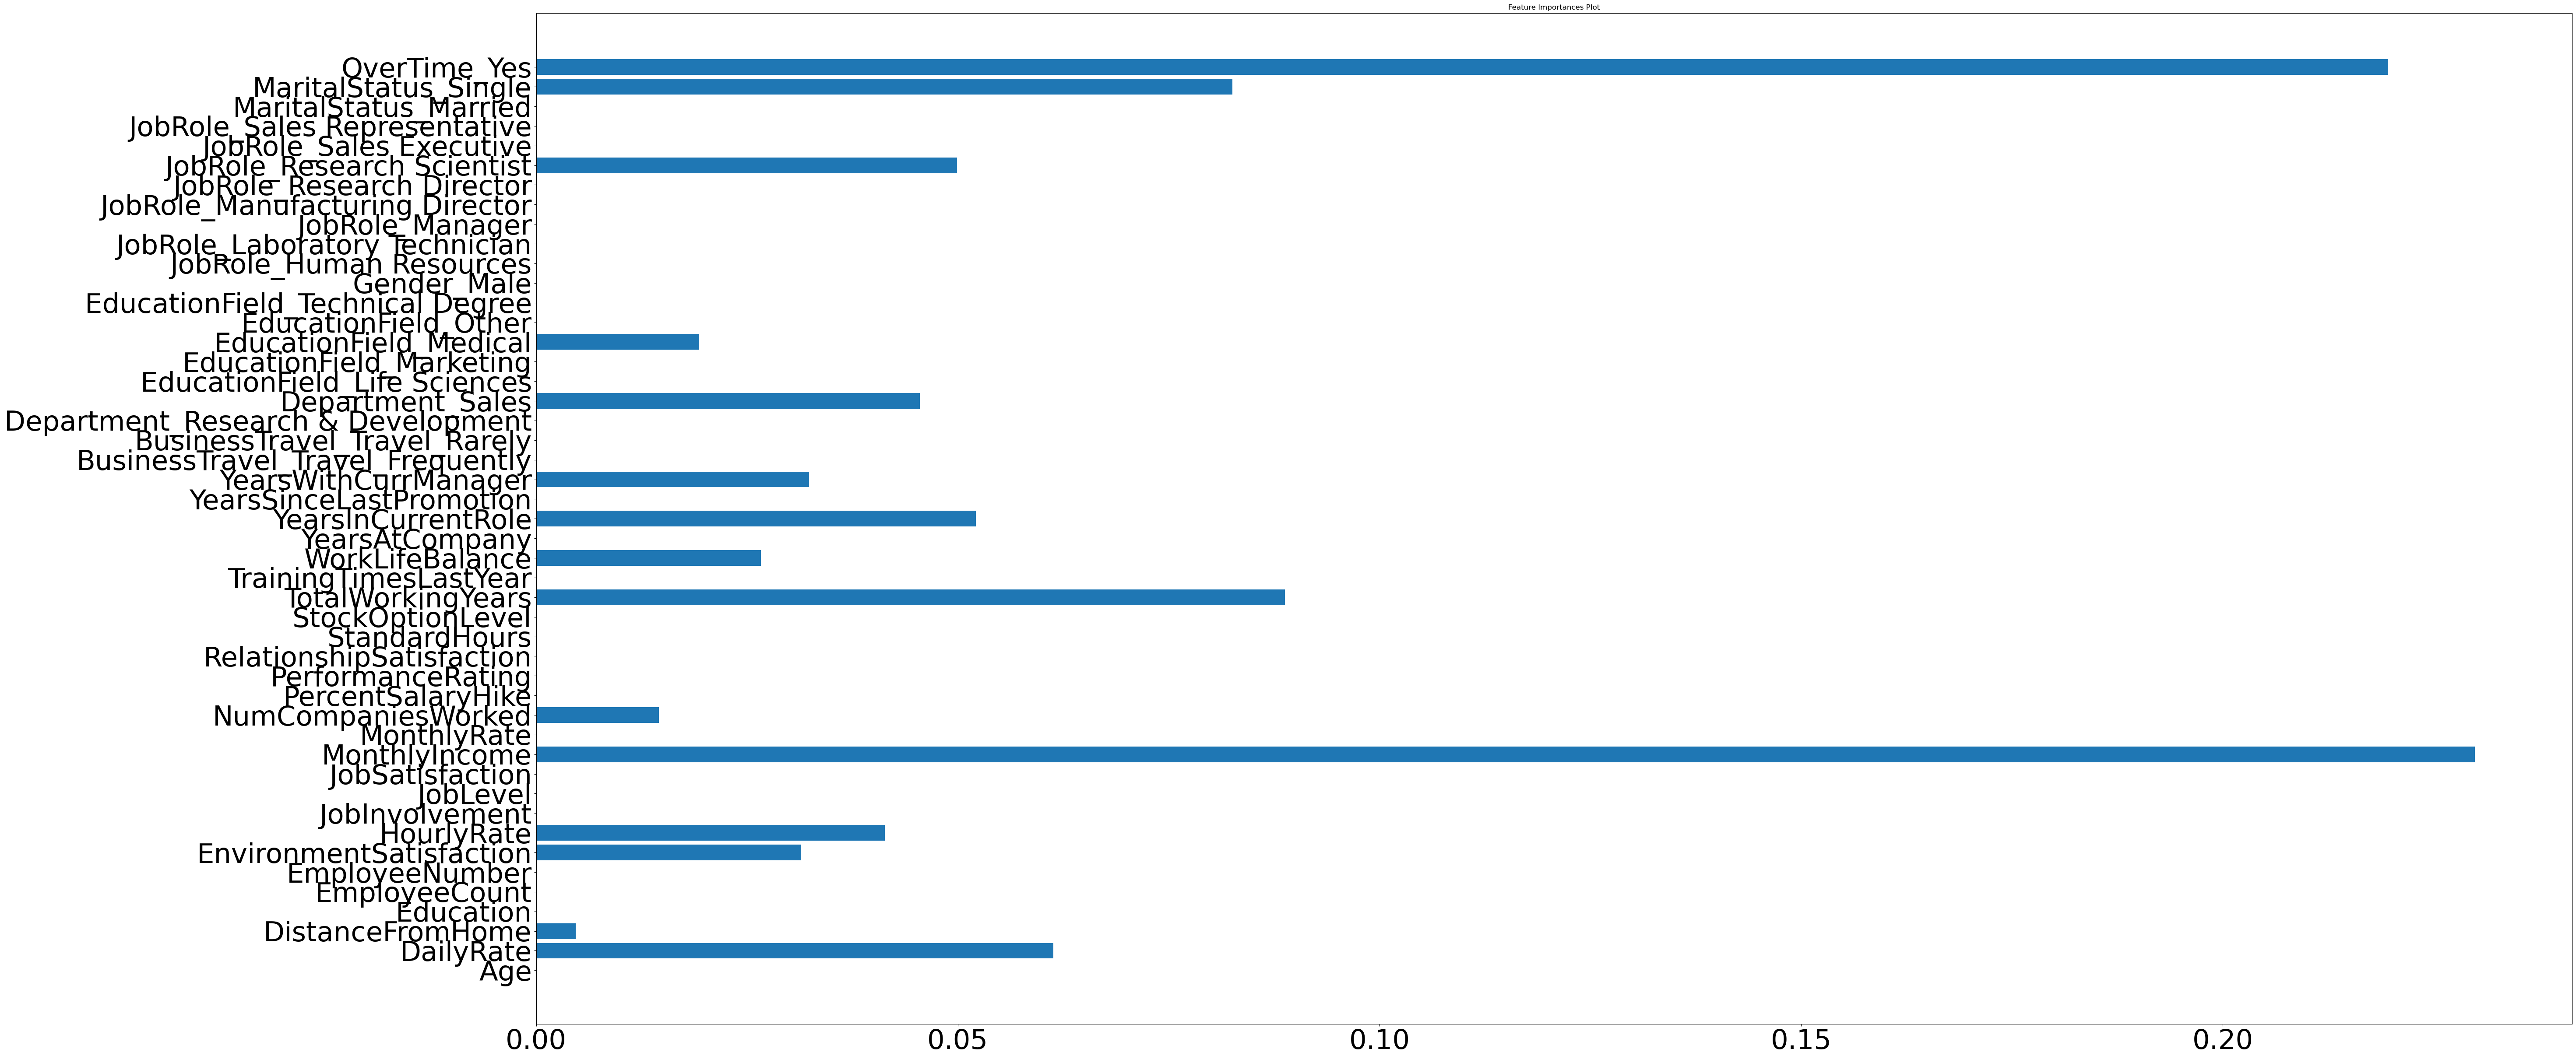

In [9]:
### View the tree
best_model = gcv.best_estimator_
plt.figure(figsize=(70,15))
tree.plot_tree(best_model,feature_names=X.columns,
               class_names=['No','Yes'],
               filled=True,fontsize=22) 

imps = best_model.feature_importances_
cols = X.columns
plt.figure(figsize=(60,30))
plt.tick_params(labelsize=45)
plt.barh(cols, imps)
plt.title("Feature Importances Plot")
plt.show()

#### Image Segmentation Dataset

In [11]:
from sklearn.preprocessing import LabelEncoder
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Cases\Image Segmentation")

In [12]:
image_seg = pd.read_csv("Image_Segmention.csv")
X = image_seg.drop('Class', axis=1)
y = image_seg['Class']

In [13]:
le = LabelEncoder()
le_y = le.fit_transform(y)
print(le.classes_)

['BRICKFACE' 'CEMENT' 'FOLIAGE' 'GRASS' 'PATH' 'SKY' 'WINDOW']


In [14]:
kfold = StratifiedKFold(n_splits=5, shuffle=True,
                        random_state=2023)
dtc = DecisionTreeClassifier(random_state=2023)
params = {'max_depth':[None, 3, 4, 5],
          'min_samples_split':[2, 5, 10],
          'min_samples_leaf':[1, 4, 10]}
gcv = GridSearchCV(dtc, param_grid=params, 
                   scoring='neg_log_loss', cv=kfold)
gcv.fit(X, le_y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
-1.4562382696633307


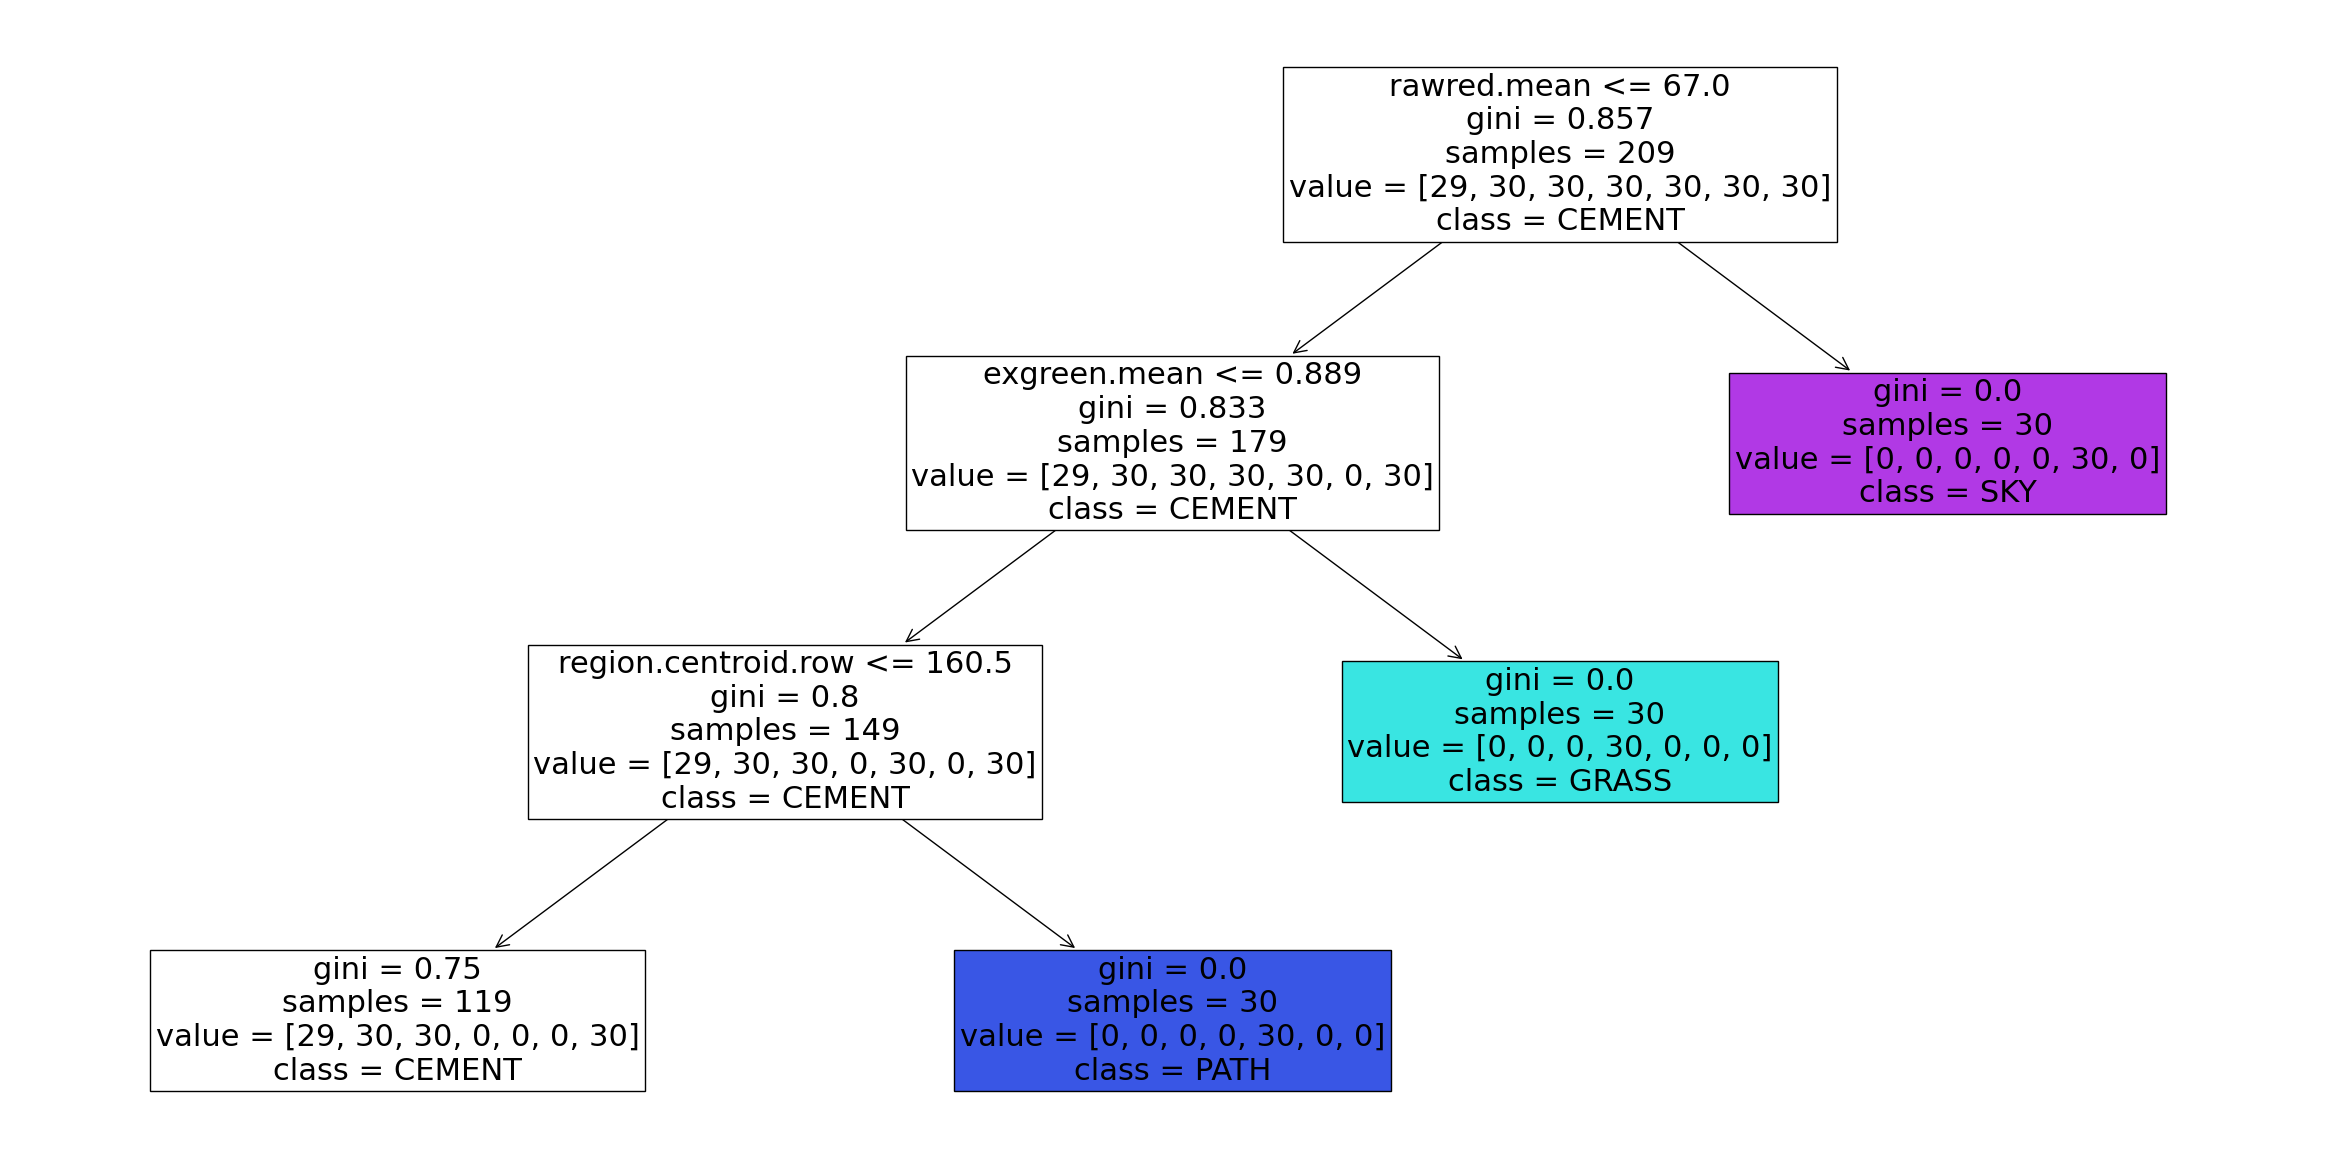

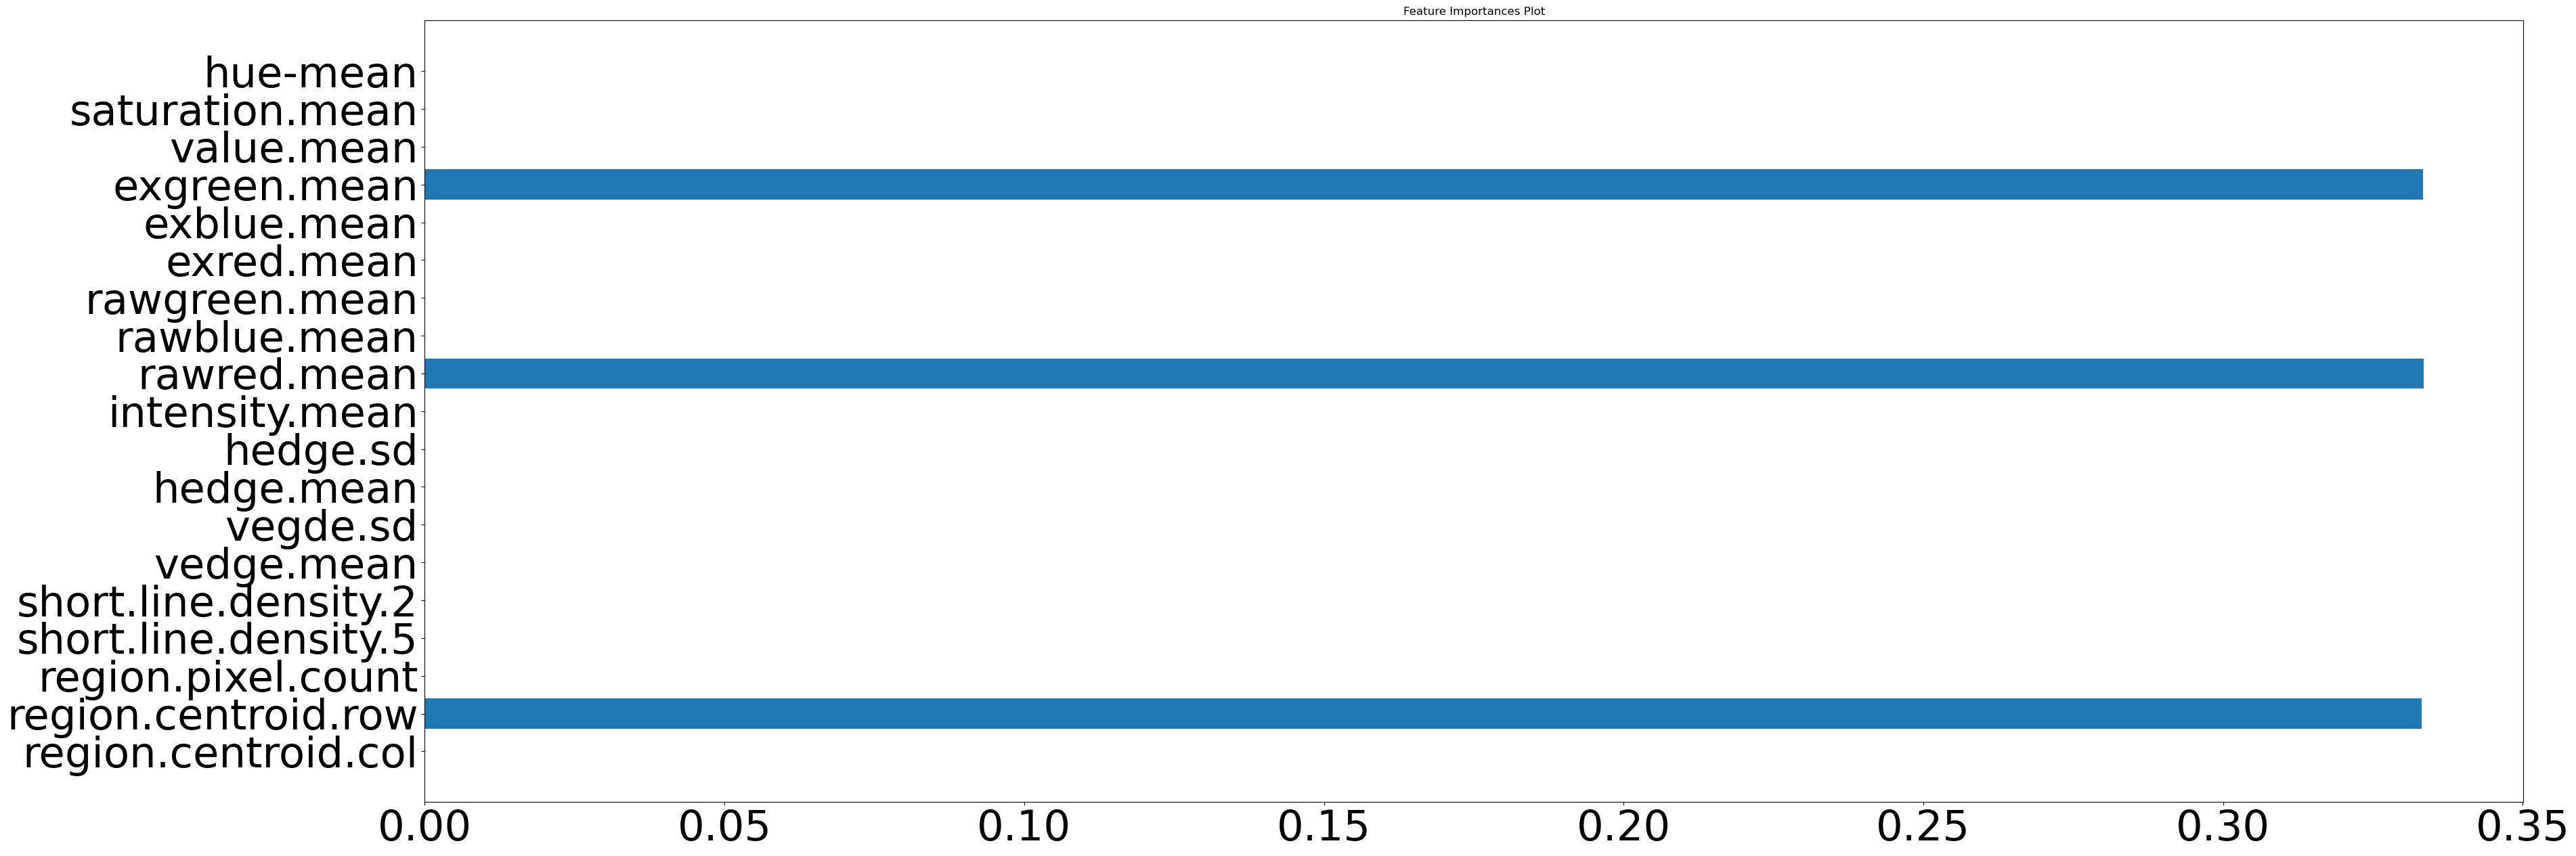

In [15]:
### View the tree
best_model = gcv.best_estimator_
plt.figure(figsize=(30,15))
tree.plot_tree(best_model,feature_names=X.columns,
               class_names=le.classes_,
               filled=True,fontsize=22) 

imps = best_model.feature_importances_
cols = X.columns
plt.figure(figsize=(40,15))
plt.tick_params(labelsize=45)
plt.barh(cols, imps)
plt.title("Feature Importances Plot")
plt.show()

#### Vehicle Silhouettes Dataset

In [17]:
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Cases\Vehicle Silhouettes")

In [18]:
vehicle = pd.read_csv("Vehicle.csv")
X = vehicle.drop('Class', axis=1)
y = vehicle['Class']

In [19]:
le = LabelEncoder()
le_y = le.fit_transform(y)

In [20]:
kfold = StratifiedKFold(n_splits=5, shuffle=True,
                        random_state=2023)
dtc = DecisionTreeClassifier(random_state=2023)
params = {'max_depth':[None, 3, 4, 5],
          'min_samples_split':[2, 4, 6, 8, 10],
          'min_samples_leaf':[1, 3, 5, 9, 11]}
gcv = GridSearchCV(dtc, param_grid=params, 
                   scoring='neg_log_loss', cv=kfold)
gcv.fit(X, le_y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 3, 'min_samples_leaf': 11, 'min_samples_split': 2}
-1.0305674768240356


[0.09356958 0.         0.         0.         0.         0.45018991
 0.         0.23126771 0.         0.         0.         0.22497281
 0.         0.         0.         0.         0.         0.        ]
Index(['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra',
       'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis',
       'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis',
       'Holl.Ra'],
      dtype='object')


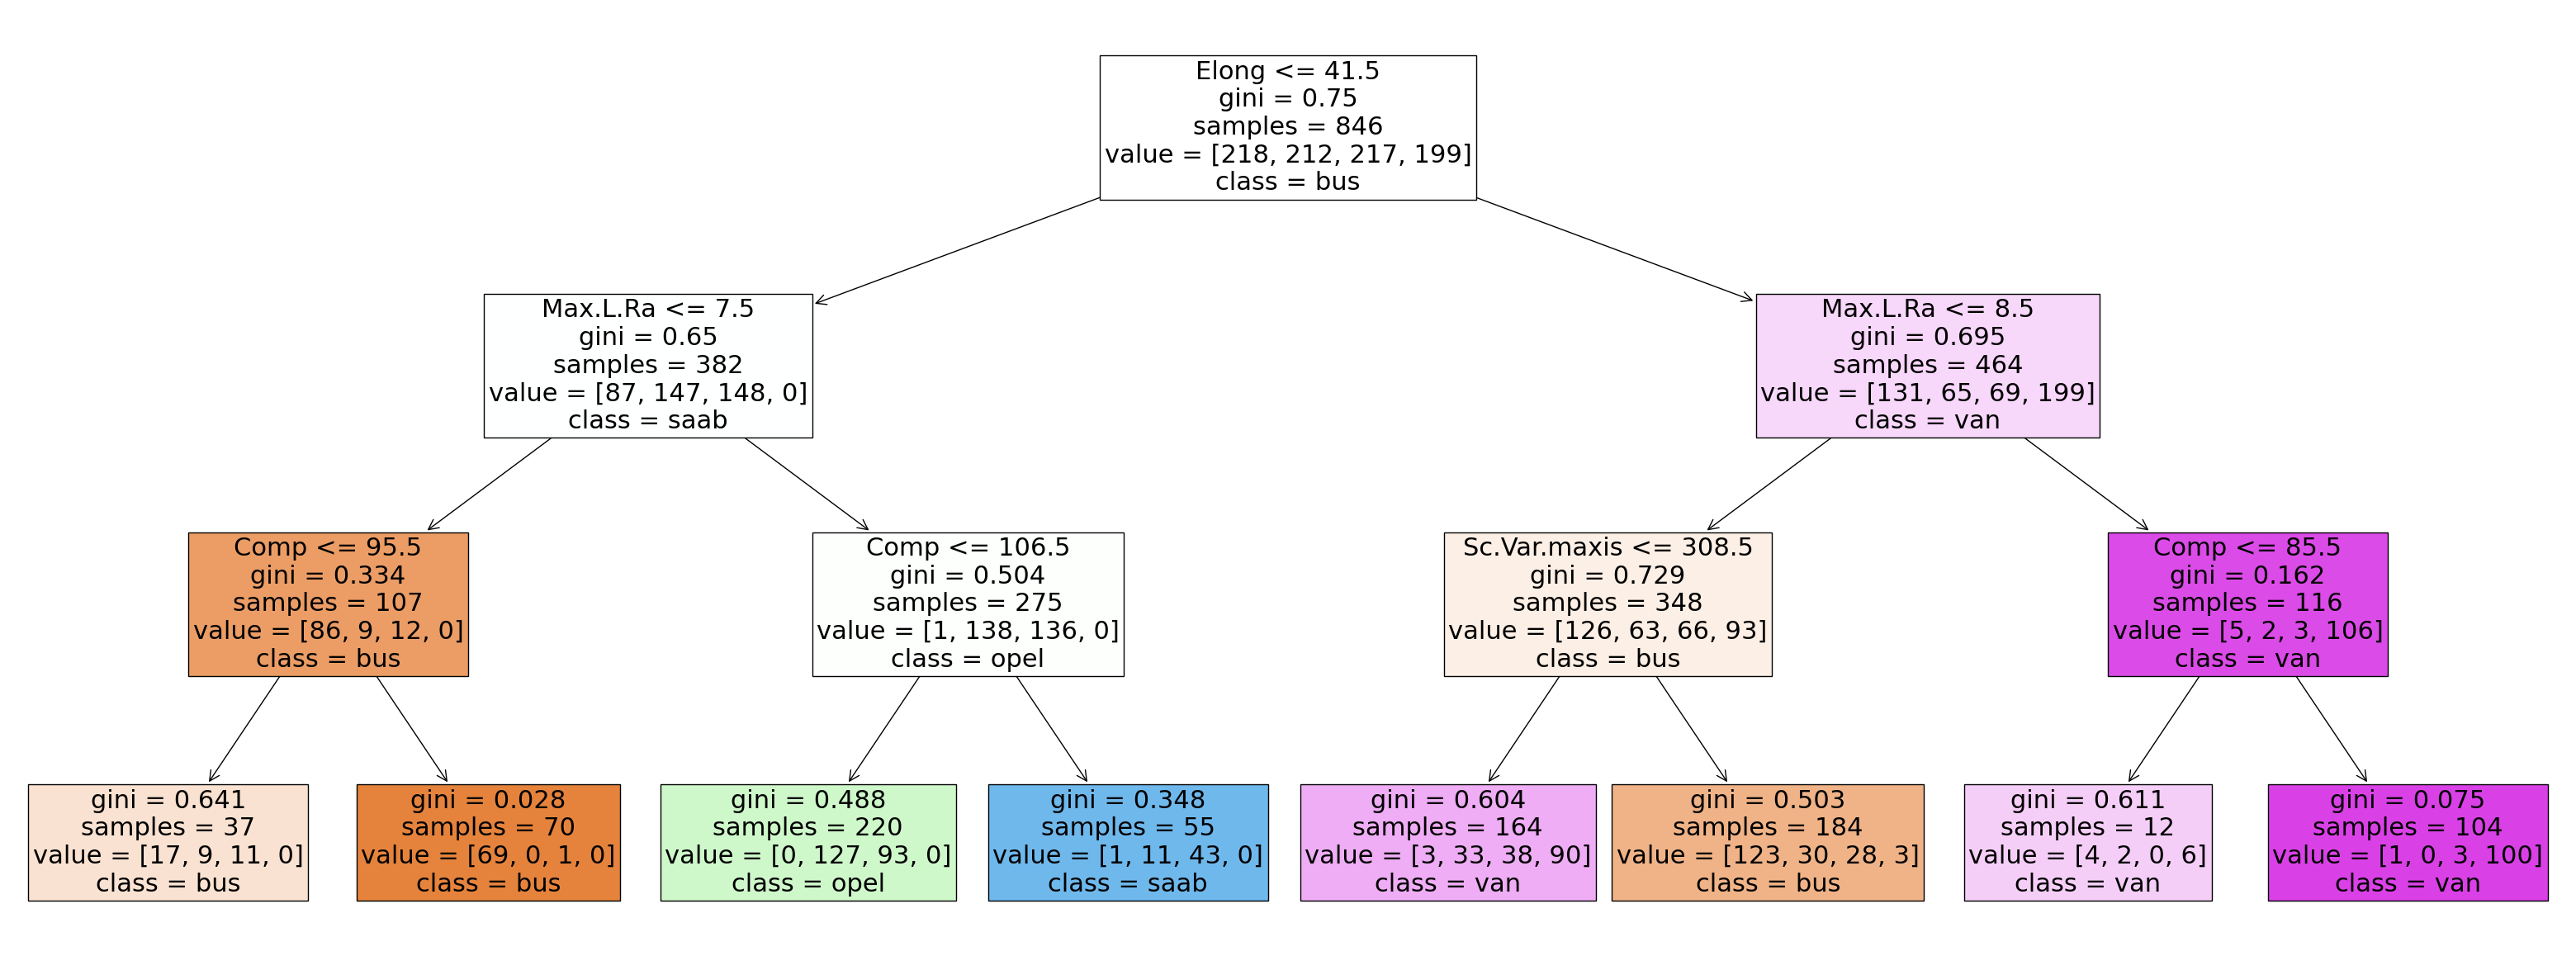

In [24]:
### View the tree
best_model = gcv.best_estimator_
plt.figure(figsize=(40,15))
tree.plot_tree(best_model,feature_names=X.columns,
               class_names=le.classes_,
               filled=True,fontsize=22) 

print(best_model.feature_importances_)
print(X.columns)
imps = best_model.feature_importances_
cols = X.columns
plt.barh(cols, imps)
plt.title("Feature Importances Plot")
plt.show()

[0.09356958 0.         0.         0.         0.         0.45018991
 0.         0.23126771 0.         0.         0.         0.22497281
 0.         0.         0.         0.         0.         0.        ]
Index(['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra',
       'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis',
       'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis',
       'Holl.Ra'],
      dtype='object')


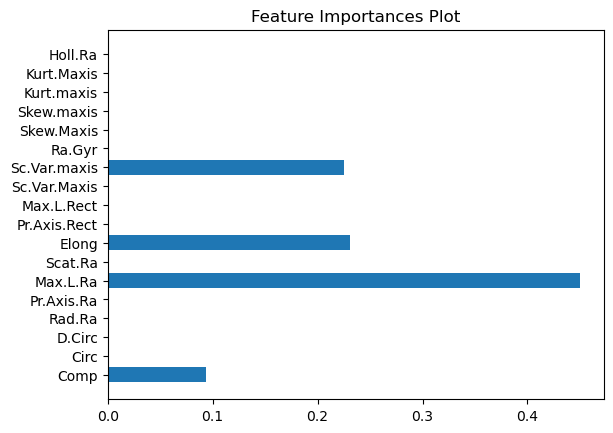

In [25]:
print(best_model.feature_importances_)
print(X.columns)
imps = best_model.feature_importances_
cols = X.columns
plt.barh(cols, imps)
plt.title("Feature Importances Plot")
plt.show()

#### Bankruptcy Dataset

In [26]:
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Cases\Bankruptcy")

In [27]:
brupt = pd.read_csv("Bankruptcy.csv")
X = brupt.drop(['NO', 'D'], axis=1)
y = brupt['D']

In [28]:
kfold = StratifiedKFold(n_splits=5, shuffle=True,
                        random_state=2023)
dtc = DecisionTreeClassifier(random_state=2023)
params = {'max_depth':[None, 3, 4, 5],
          'min_samples_split':[2, 4, 6, 8, 10],
          'min_samples_leaf':[1, 3, 5, 9, 11]}
gcv = GridSearchCV(dtc, param_grid=params, 
                   scoring='roc_auc', cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.827557058326289


[Text(0.4583333333333333, 0.875, 'R24 <= 0.095\ngini = 0.5\nsamples = 132\nvalue = [66, 66]\nclass = bus'),
 Text(0.25, 0.625, 'R9 <= 2.14\ngini = 0.228\nsamples = 61\nvalue = [53, 8]\nclass = bus'),
 Text(0.16666666666666666, 0.375, 'R8 <= 11.07\ngini = 0.16\nsamples = 57\nvalue = [52, 5]\nclass = bus'),
 Text(0.08333333333333333, 0.125, 'gini = 0.078\nsamples = 49\nvalue = [47, 2]\nclass = bus'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = bus'),
 Text(0.3333333333333333, 0.375, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = opel'),
 Text(0.6666666666666666, 0.625, 'R21 <= 1.625\ngini = 0.299\nsamples = 71\nvalue = [13, 58]\nclass = opel'),
 Text(0.5, 0.375, 'R10 <= 0.395\ngini = 0.5\nsamples = 22\nvalue = [11, 11]\nclass = bus'),
 Text(0.4166666666666667, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = opel'),
 Text(0.5833333333333334, 0.125, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = bus'),
 Text(0.8333333333333334, 0.375, 'R18 

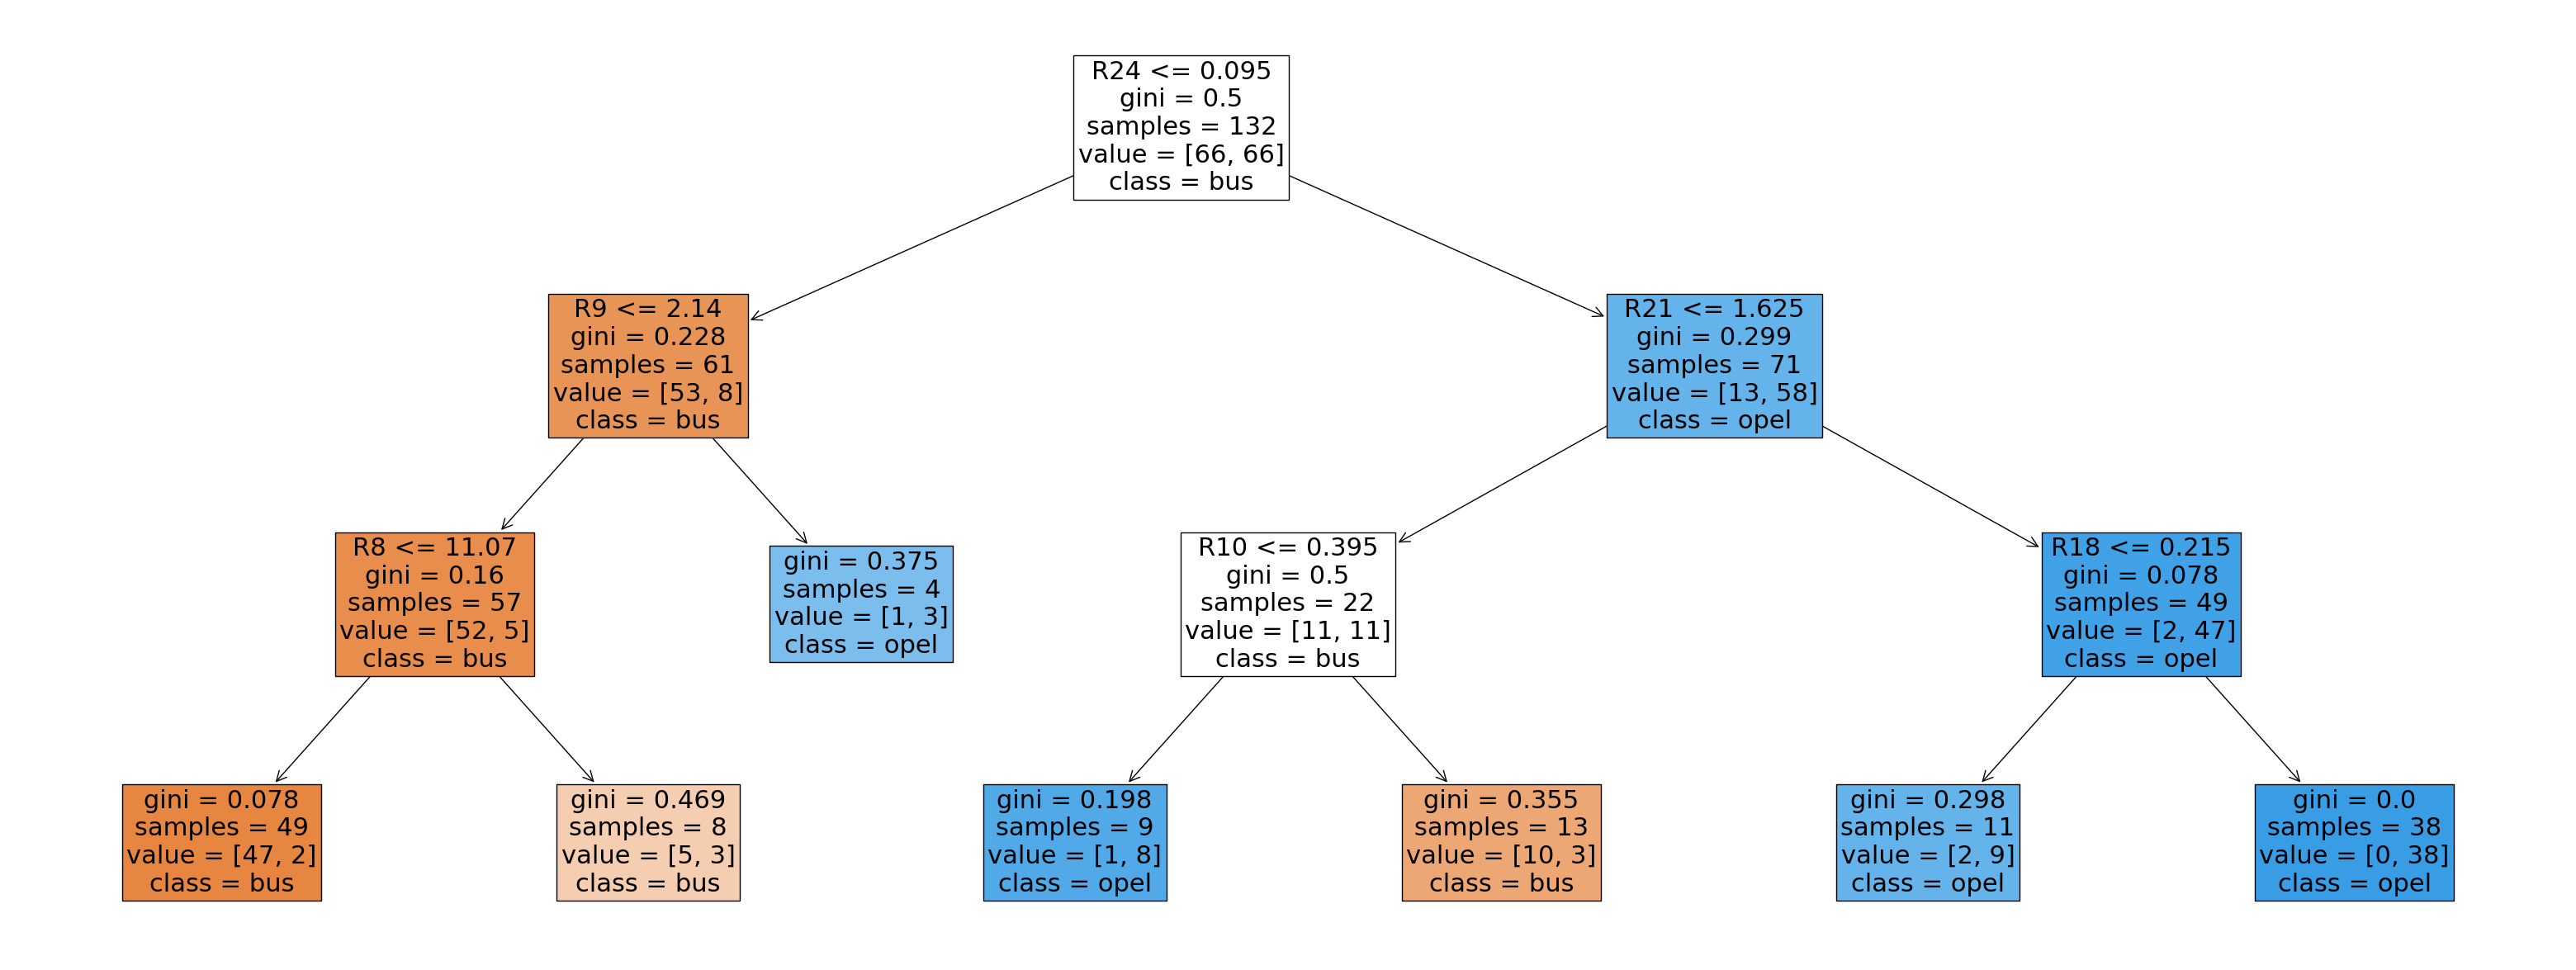

In [29]:
### View the tree
best_model = gcv.best_estimator_
plt.figure(figsize=(40,15))
tree.plot_tree(best_model,feature_names=X.columns,
               class_names=le.classes_,
               filled=True,fontsize=22)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.03251127 0.06939713 0.09750462 0.
 0.         0.         0.         0.         0.         0.
 0.01193733 0.         0.         0.13551445 0.         0.
 0.6531352 ]
Index(['YR', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
       'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20',
       'R21', 'R22', 'R23', 'R24'],
      dtype='object')


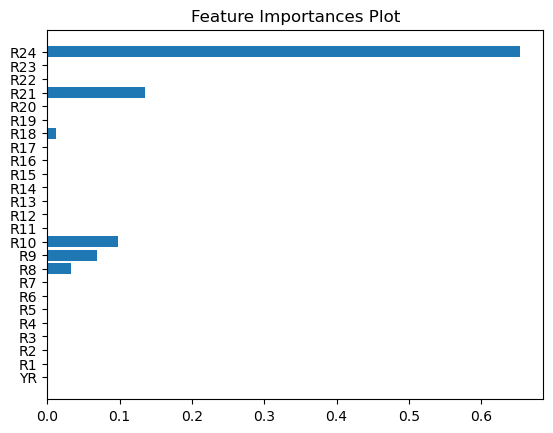

In [30]:
print(best_model.feature_importances_)
print(X.columns)
imps = best_model.feature_importances_
cols = X.columns
plt.barh(cols, imps)
plt.title("Feature Importances Plot")
plt.show()

## Regression Trees

In [31]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import tree

In [32]:
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Datasets")

#### Housing Dataset

In [33]:
housing = pd.read_csv("Housing.csv")
dum_hous = pd.get_dummies(housing, drop_first=True)
X = dum_hous.drop('price', axis=1)
y = dum_hous['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=2023,
                                                    test_size=0.3)

[Text(0.5, 0.875, 'lotsize <= 5954.0\nsquared_error = 634347179.259\nsamples = 382\nvalue = 66531.013'),
 Text(0.25, 0.625, 'lotsize <= 4016.0\nsquared_error = 292857990.721\nsamples = 254\nvalue = 56360.846'),
 Text(0.125, 0.375, 'fullbase_yes <= 0.5\nsquared_error = 179306554.943\nsamples = 151\nvalue = 50344.404'),
 Text(0.0625, 0.125, 'squared_error = 139045826.884\nsamples = 104\nvalue = 47200.529'),
 Text(0.1875, 0.125, 'squared_error = 198128137.166\nsamples = 47\nvalue = 57301.064'),
 Text(0.375, 0.375, 'bathrms <= 1.5\nsquared_error = 328463937.694\nsamples = 103\nvalue = 65181.068'),
 Text(0.3125, 0.125, 'squared_error = 244395751.561\nsamples = 78\nvalue = 61457.051'),
 Text(0.4375, 0.125, 'squared_error = 412488000.0\nsamples = 25\nvalue = 76800.0'),
 Text(0.75, 0.625, 'bathrms <= 1.5\nsquared_error = 699451447.371\nsamples = 128\nvalue = 86712.438'),
 Text(0.625, 0.375, 'airco_yes <= 0.5\nsquared_error = 548528951.29\nsamples = 79\nvalue = 77091.772'),
 Text(0.5625, 0.125,

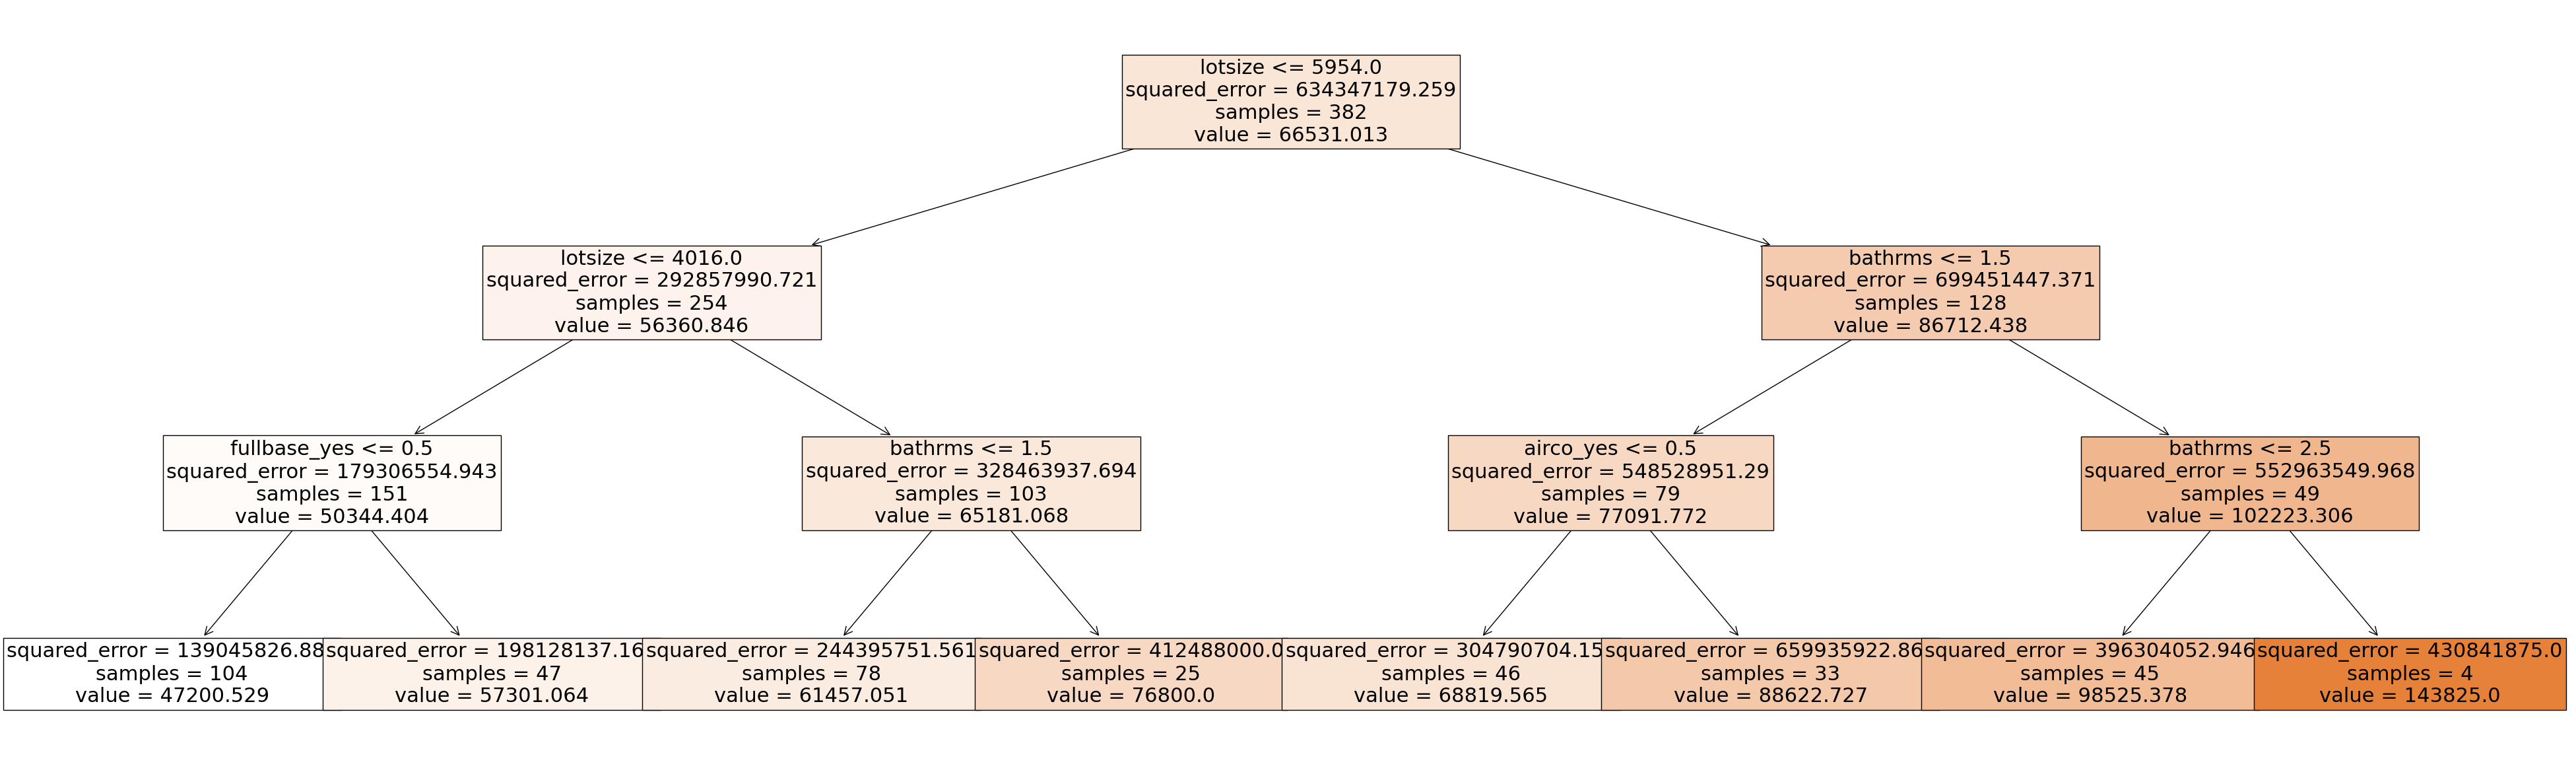

In [35]:
dtr = DecisionTreeRegressor(random_state=2023, max_depth=3)
dtr.fit(X_train, y_train)

plt.figure(figsize=(50,15))
tree.plot_tree(dtr,feature_names=X.columns,
               filled=True,fontsize=22) 

In [36]:
y_pred = dtr.predict(X_test)

In [37]:
###################### Grid Search CV #######################
kfold = KFold(n_splits=5, shuffle=True,
                        random_state=2023)
dtr = DecisionTreeRegressor(random_state=2023)
params = {'max_depth':[None, 3, 4, 5],
          'min_samples_split':[2, 5, 10],
          'min_samples_leaf':[1, 4, 10]}
gcv = GridSearchCV(dtr, param_grid=params, 
                   scoring='r2', cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.46489286587435663


[Text(0.5426829268292683, 0.9166666666666666, 'lotsize <= 5954.0\nsquared_error = 711726713.995\nsamples = 546\nvalue = 68121.597'),
 Text(0.29878048780487804, 0.75, 'bathrms <= 1.5\nsquared_error = 343663992.374\nsamples = 362\nvalue = 57638.812'),
 Text(0.18292682926829268, 0.5833333333333334, 'lotsize <= 4016.0\nsquared_error = 231558730.612\nsamples = 294\nvalue = 54003.571'),
 Text(0.0975609756097561, 0.4166666666666667, 'stories <= 1.5\nsquared_error = 168557540.732\nsamples = 174\nvalue = 49017.529'),
 Text(0.04878048780487805, 0.25, 'lotsize <= 3405.0\nsquared_error = 129443331.484\nsamples = 80\nvalue = 44539.375'),
 Text(0.024390243902439025, 0.08333333333333333, 'squared_error = 72274933.997\nsamples = 34\nvalue = 39302.941'),
 Text(0.07317073170731707, 0.08333333333333333, 'squared_error = 136451045.605\nsamples = 46\nvalue = 48409.783'),
 Text(0.14634146341463414, 0.25, 'airco_yes <= 0.5\nsquared_error = 170253909.009\nsamples = 94\nvalue = 52828.723'),
 Text(0.12195121951

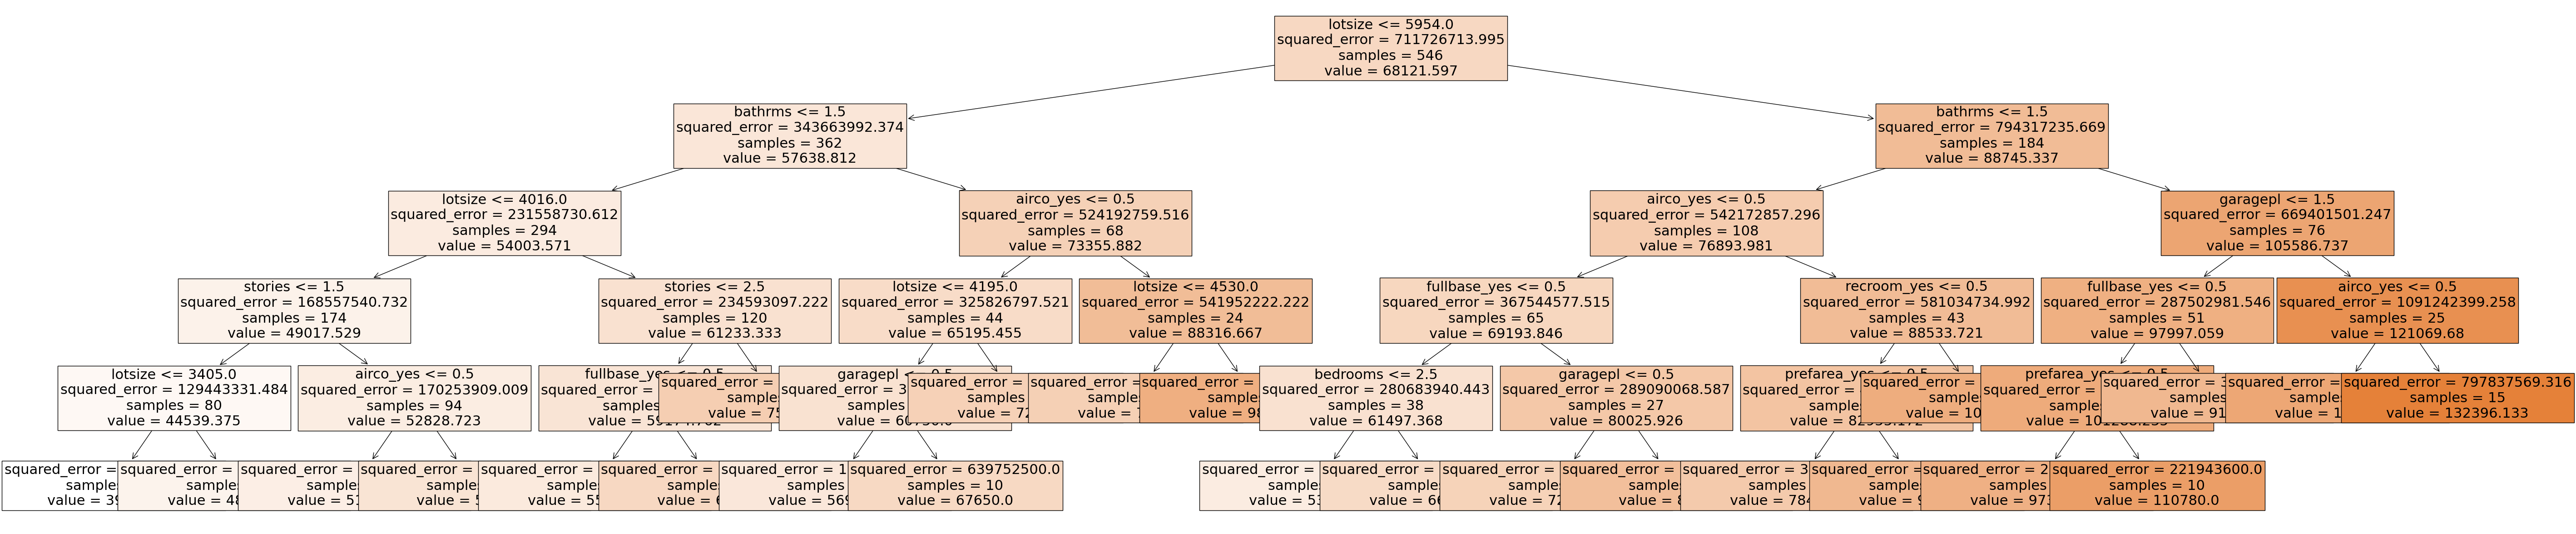

In [38]:
### View the tree
best_model = gcv.best_estimator_
plt.figure(figsize=(70,15))
tree.plot_tree(best_model,feature_names=X.columns,
               filled=True,fontsize=22) 


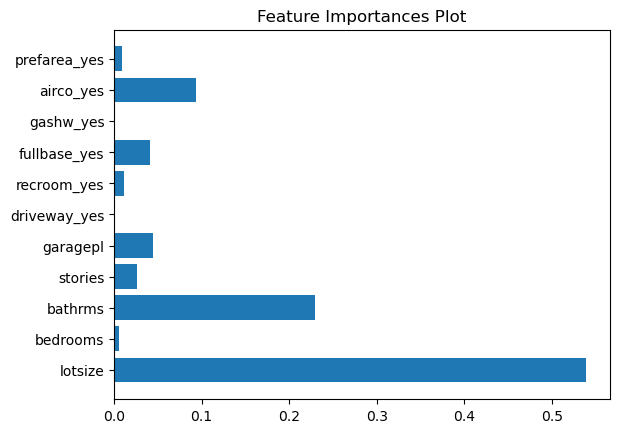

In [39]:
imps = best_model.feature_importances_
cols = X.columns
#plt.figure(figsize=(60,30))
#plt.tick_params(labelsize=45)
plt.barh(cols, imps)
plt.title("Feature Importances Plot")
plt.show()


#### Concrete Dataset

In [40]:
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Cases\Concrete Strength")

In [41]:
concrete = pd.read_csv("Concrete_Data.csv")
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']

In [42]:
kfold = KFold(n_splits=5, shuffle=True,
                        random_state=2023)
dtr = DecisionTreeRegressor(random_state=2023)
params = {'max_depth':[None, 2, 5],
          'min_samples_split':np.arange(2, 11),
          'min_samples_leaf':np.arange(2, 11)}
gcv = GridSearchCV(dtr, param_grid=params, 
                   scoring='r2', cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.8345012732696102


[Text(0.4524129231770833, 0.9705882352941176, 'Age <= 21.0\nsquared_error = 278.811\nsamples = 1030\nvalue = 35.818'),
 Text(0.18570963541666666, 0.9117647058823529, 'Cement <= 354.5\nsquared_error = 153.562\nsamples = 324\nvalue = 23.541'),
 Text(0.11360677083333333, 0.8529411764705882, 'Age <= 10.5\nsquared_error = 79.945\nsamples = 230\nvalue = 18.706'),
 Text(0.06575520833333333, 0.7941176470588235, 'Cement <= 255.25\nsquared_error = 52.389\nsamples = 173\nvalue = 15.714'),
 Text(0.03125, 0.7352941176470589, 'Cement <= 155.0\nsquared_error = 26.88\nsamples = 111\nvalue = 13.076'),
 Text(0.020833333333333332, 0.6764705882352942, 'Age <= 5.0\nsquared_error = 10.637\nsamples = 17\nvalue = 7.73'),
 Text(0.015625, 0.6176470588235294, 'squared_error = 3.077\nsamples = 8\nvalue = 5.131'),
 Text(0.026041666666666668, 0.6176470588235294, 'squared_error = 6.019\nsamples = 9\nvalue = 10.04'),
 Text(0.041666666666666664, 0.6764705882352942, 'Superplasticizer <= 11.8\nsquared_error = 23.715\nsa

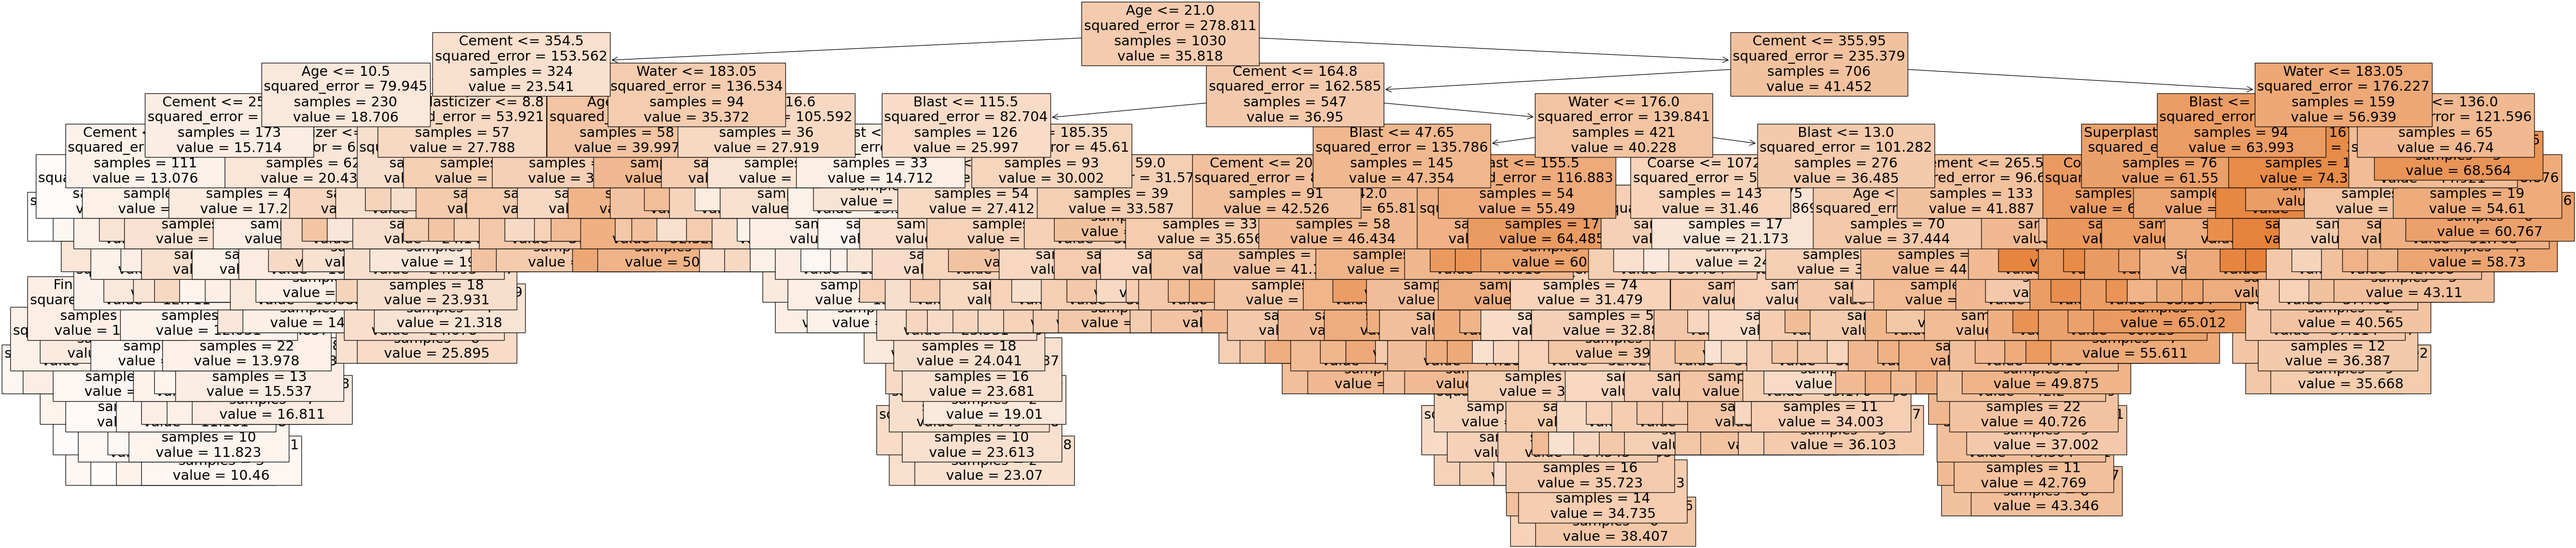

In [43]:
### View the tree
best_model = gcv.best_estimator_
plt.figure(figsize=(70,15))
tree.plot_tree(best_model,feature_names=X.columns,
               filled=True,fontsize=22) 

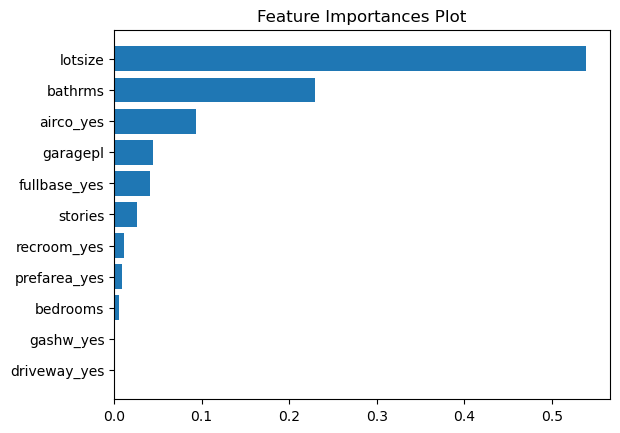

In [44]:
s_index = np.argsort(imps)
sorted_imps = imps[s_index]
sorted_x = cols[s_index]
plt.barh(sorted_x, sorted_imps)
plt.title("Feature Importances Plot")
plt.show()

#### Medical Cost Personal

In [45]:
os.chdir(r"C:\CDAC\6_Practical_Machine_Learning\Cases\Medical Cost Personal")

In [46]:
medical = pd.read_csv("insurance.csv")
dum_med = pd.get_dummies(medical, drop_first=True)
X = dum_med.drop('charges', axis=1)
y = dum_med['charges']

In [47]:
kfold = KFold(n_splits=5, shuffle=True,
                        random_state=2023)
dtr = DecisionTreeRegressor(random_state=2023)
params = {'max_depth':[None, 2, 5],
          'min_samples_split':np.arange(2, 11),
          'min_samples_leaf':np.arange(2, 11)}
gcv = GridSearchCV(dtr, param_grid=params, 
                   scoring='r2', cv=kfold)
gcv.fit(X, y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.8573946912614747


[Text(0.5, 0.9166666666666666, 'smoker_yes <= 0.5\nsquared_error = 146542766.494\nsamples = 1338\nvalue = 13270.422'),
 Text(0.25, 0.75, 'age <= 42.5\nsquared_error = 35891656.003\nsamples = 1064\nvalue = 8434.268'),
 Text(0.125, 0.5833333333333334, 'children <= 0.5\nsquared_error = 22145208.607\nsamples = 596\nvalue = 5398.85'),
 Text(0.0625, 0.4166666666666667, 'age <= 32.5\nsquared_error = 16936983.559\nsamples = 253\nvalue = 3850.841'),
 Text(0.03125, 0.25, 'age <= 22.5\nsquared_error = 15402722.978\nsamples = 207\nvalue = 3269.547'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 11536916.879\nsamples = 121\nvalue = 2585.698'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 19258096.923\nsamples = 86\nvalue = 4231.708'),
 Text(0.09375, 0.25, 'sex_male <= 0.5\nsquared_error = 15478063.204\nsamples = 46\nvalue = 6466.664'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 453272.68\nsamples = 24\nvalue = 5487.082'),
 Text(0.109375, 0.08333333333333333, 'squared_er

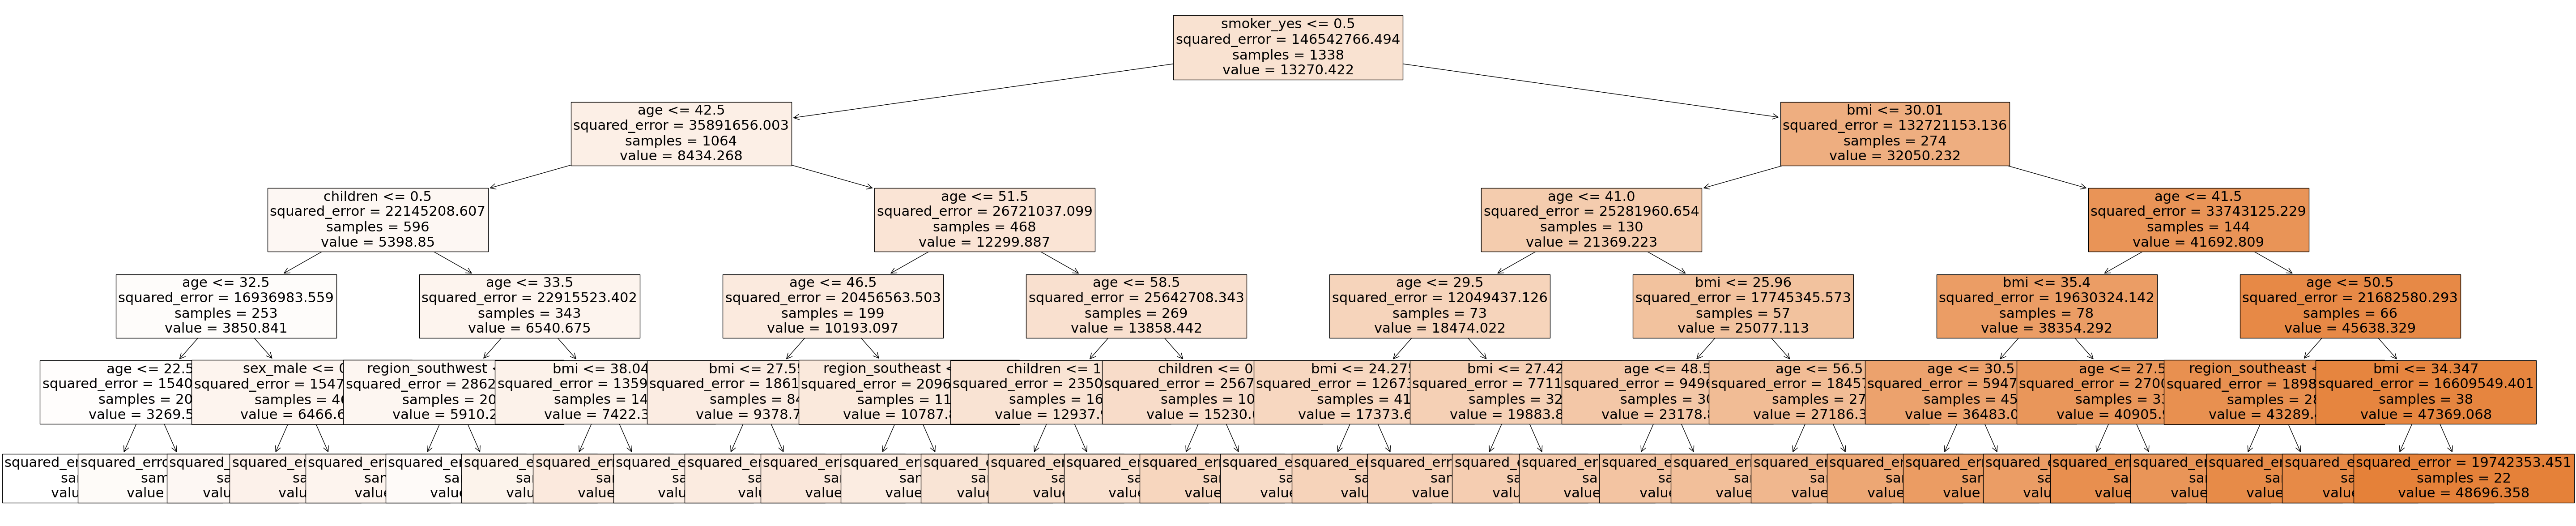

In [48]:
### View the tree
best_model = gcv.best_estimator_
plt.figure(figsize=(70,15))
tree.plot_tree(best_model,feature_names=X.columns,
               filled=True,fontsize=22) 

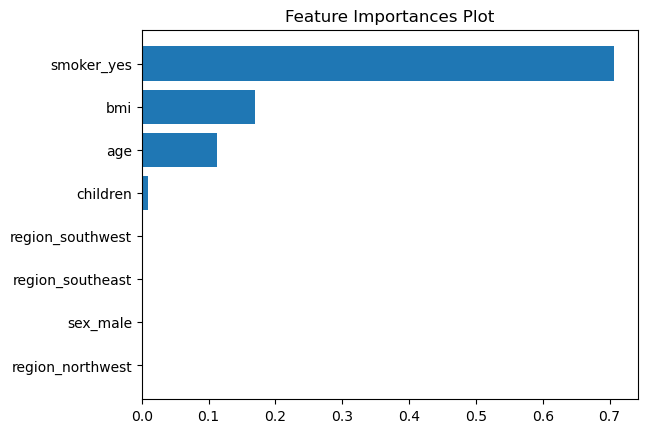

In [49]:
imps = best_model.feature_importances_
cols = X.columns

s_index = np.argsort(imps)
sorted_imps = imps[s_index]
sorted_x = cols[s_index]
plt.barh(sorted_x, sorted_imps)
plt.title("Feature Importances Plot")
plt.show()